In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import matplotlib.dates as mdates

In [2]:
df = pd.read_csv('R:/OwnCloud/WetScapes/2020_04_30_BGS_paper/Daten/DWDData_merged.csv')

In [3]:
df.head()

,timestamp,atemp,relhum,rgmin,rghourly,rg,prec
0,1991-11-13 18:00:00,NaN,NaN,NaN,NaN,NaN,0.0
1,1991-11-13 18:30:00,7.350000,71.000000,NaN,NaN,NaN,0.0
2,1991-11-13 19:00:00,7.133333,73.000000,NaN,NaN,NaN,0.0
3,1991-11-13 19:30:00,7.066667,74.666667,NaN,NaN,NaN,0.0
4,1991-11-13 20:00:00,6.900000,75.000000,NaN,NaN,NaN,0.0


In [4]:
df['date'] = pd.to_datetime(df['timestamp'])
data = df.loc[:, ['rg']]
data = data.set_index(df.date)
data['rg'] = pd.to_numeric(data['rg'],downcast='float',errors='coerce')

In [5]:
data.head()

,rg
date,
1991-11-13 18:00:00,NaN
1991-11-13 18:30:00,NaN
1991-11-13 19:00:00,NaN
1991-11-13 19:30:00,NaN
1991-11-13 20:00:00,NaN


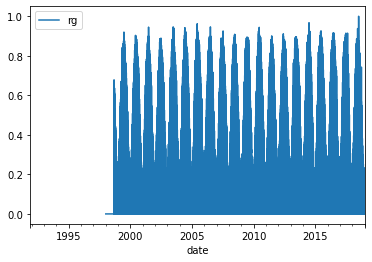

In [6]:
data=data/1000 # W to kW/m²
data.plot()
plt.show()

In [7]:
#umrechnen in Tageswerte

daily = data.resample('D').sum()
print(daily.head())


             rg
date           
1991-11-13  0.0
1991-11-14  0.0
1991-11-15  0.0
1991-11-16  0.0
1991-11-17  0.0


In [8]:
series = pd.Series(daily['rg'])
# 2012 ist ein schaltjahr --> 29.2.2012 wir rausgelöscht

#help(series)

test3 = series.loc['1999-01-01':'2000-02-28']
test4 = series.loc['2000-03-01':'2004-02-28']
test5 = series.loc['2004-03-01':'2008-02-28']
test6 = series.loc['2008-03-01':'2012-02-28']
test7 = series.loc['2012-03-01':'2016-02-28']
test8 = series.loc['2016-03-01':'2018-12-31']

series_ = pd.concat([
    #test1,
    #test2,
    test3,test4,test5,test6,test7,test8])




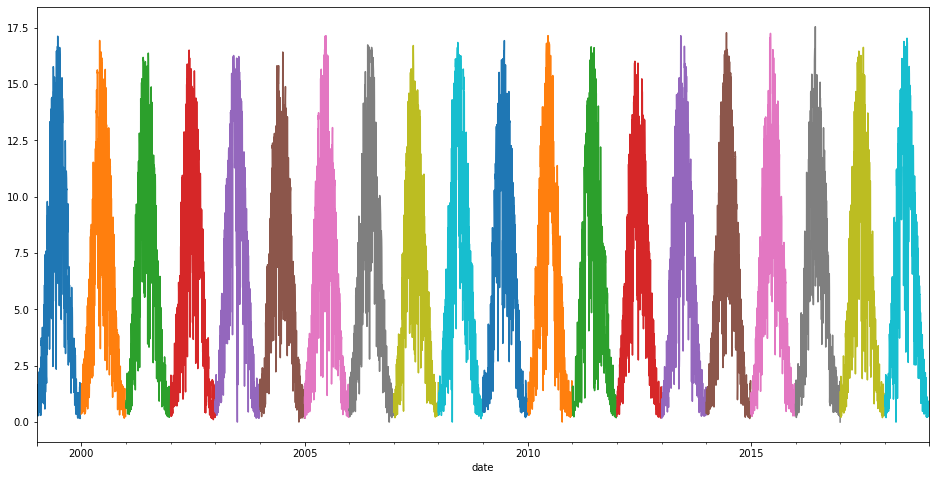

In [9]:
groups = series_.groupby(pd.Grouper(freq='A'))
groups.plot(figsize=(16,8))

#plt.savefig('R:\\OwnCloud\\WetScapes\\2019_03_31_ERL_paper\\Artikel_ERL\\figures\\Niederschlag2009-18_absolut.png', dpi=300, quality=95, format="png")
plt.show()


In [10]:
groups.count()

date
1999-12-31    365
2000-12-31    365
2001-12-31    365
2002-12-31    365
2003-12-31    365
2004-12-31    365
2005-12-31    365
2006-12-31    365
2007-12-31    365
2008-12-31    365
2009-12-31    365
2010-12-31    365
2011-12-31    365
2012-12-31    365
2013-12-31    365
2014-12-31    365
2015-12-31    365
2016-12-31    365
2017-12-31    365
2018-12-31    365
Freq: A-DEC, Name: rg, dtype: int64

In [11]:
ann_prec = {}
for name,group in groups:
    ann_prec[name.year] = group.sum().round()


ann_prec

{1999: 2189.0,
 2000: 2005.0,
 2001: 2073.0,
 2002: 2039.0,
 2003: 2288.0,
 2004: 2114.0,
 2005: 2204.0,
 2006: 2161.0,
 2007: 2078.0,
 2008: 2206.0,
 2009: 2227.0,
 2010: 2096.0,
 2011: 2109.0,
 2012: 2101.0,
 2013: 2184.0,
 2014: 2225.0,
 2015: 2223.0,
 2016: 2156.0,
 2017: 2076.0,
 2018: 2370.0}

In [28]:
print('Mean rad without 2018: {} kW/m²'.format(np.array(list(ann_prec.values())[:-1]).mean()))
print('STD rad without 2018: {} kW/m²'.format(np.array(list(ann_prec.values())[:-1]).std()))
print('difference between 2018 and refence range: {} kW/m²'.format(list(ann_prec.values())[-1]-np.array(list(ann_prec.values())[:-1]).mean()))

Mean rad without 2018: 2144.947265625 mm
STD rad without 2018: 73.46926879882812 mm
difference between 2018 and refence range: 225.052734375 mm


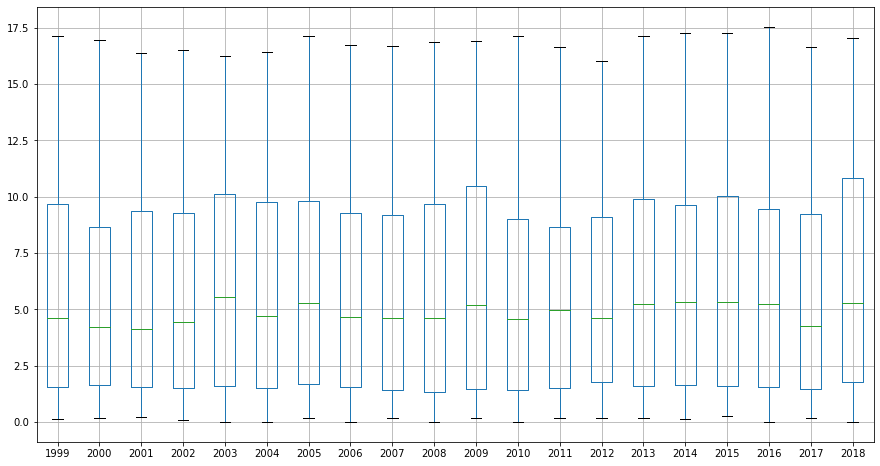

In [12]:
years = pd.DataFrame()

for name, group in groups:
    years[name.year] = group.values

years.boxplot(showfliers=False, figsize=(15,8))

#plt.savefig('R:\\OwnCloud\\WetScapes\\2019_03_31_ERL_paper\\Artikel_ERL\\figures\\Niederschlag2009-18_boxplot.png', dpi=300, quality=95, format="png")
plt.show()


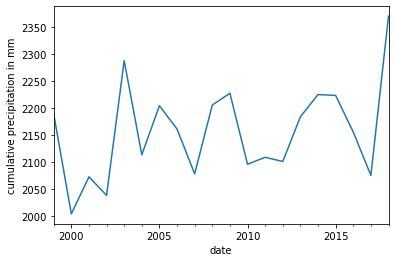

In [13]:
# daily = tagessummen von precipitation

# data_2009_2019 = halbstündige werte

# series_ Schaltjahr-bereinigt 


groups.sum().plot()

plt.ylabel('cumulative precipitation in mm')
plt.show()

In [14]:
rad_1999 = daily.loc['1999-01-01': '1999-12-31']
rad_2000 = daily.loc['2000-01-01': '2000-12-31']
rad_2001 = daily.loc['2001-01-01': '2001-12-31']
rad_2002 = daily.loc['2002-01-01': '2002-12-31']
rad_2003 = daily.loc['2003-01-01': '2003-12-31']
rad_2004 = daily.loc['2004-01-01': '2004-12-31']
rad_2005 = daily.loc['2005-01-01': '2005-12-31']
rad_2006 = daily.loc['2006-01-01': '2006-12-31']
rad_2007 = daily.loc['2007-01-01': '2007-12-31']
rad_2008 = daily.loc['2008-01-01': '2008-12-31']
rad_2009 = daily.loc['2009-01-01': '2009-12-31']
rad_2010 = daily.loc['2010-01-01': '2010-12-31']
rad_2011 = daily.loc['2011-01-01': '2011-12-31']
rad_2012 = daily.loc['2012-01-01': '2012-12-31']
rad_2013 = daily.loc['2013-01-01': '2013-12-31']
rad_2014 = daily.loc['2014-01-01': '2014-12-31']
rad_2015 = daily.loc['2015-01-01': '2015-12-31']
rad_2016 = daily.loc['2016-01-01': '2016-12-31']
rad_2017 = daily.loc['2017-01-01': '2017-12-31']
rad_2018 = daily.loc['2018-01-01': '2018-12-31']

rad_1999 = rad_1999.reset_index()
rad_2000 = rad_2000.reset_index()
rad_2001 = rad_2001.reset_index()
rad_2002 = rad_2002.reset_index()
rad_2003 = rad_2003.reset_index()
rad_2004 = rad_2004.reset_index()
rad_2005 = rad_2005.reset_index()
rad_2006 = rad_2006.reset_index()
rad_2007 = rad_2007.reset_index()
rad_2008 = rad_2008.reset_index()
rad_2009 = rad_2009.reset_index()
rad_2010 = rad_2010.reset_index()
rad_2011 = rad_2011.reset_index()
rad_2012 = rad_2012.reset_index()
rad_2013 = rad_2013.reset_index()
rad_2014 = rad_2014.reset_index()
rad_2015 = rad_2015.reset_index()
rad_2016 = rad_2016.reset_index()
rad_2017 = rad_2017.reset_index()
rad_2018 = rad_2018.reset_index()


merge_table = pd.DataFrame()
merge_table['1999'] = rad_1999['rg']
merge_table['2000'] = rad_2000['rg']
merge_table['2001'] = rad_2001['rg']
merge_table['2002'] = rad_2002['rg']
merge_table['2003'] = rad_2003['rg']
merge_table['2004'] = rad_2004['rg']
merge_table['2005'] = rad_2005['rg']
merge_table['2006'] = rad_2006['rg']
merge_table['2007'] = rad_2007['rg']
merge_table['2008'] = rad_2008['rg']
merge_table['2009'] = rad_2009['rg']
merge_table['2010'] = rad_2010['rg']
merge_table['2011'] = rad_2011['rg']
merge_table['2012'] = rad_2012['rg']
merge_table['2013'] = rad_2013['rg']
merge_table['2014'] = rad_2014['rg']
merge_table['2015'] = rad_2015['rg']
merge_table['2016'] = rad_2016['rg']
merge_table['2017'] = rad_2017['rg']
merge_table['2018'] = rad_2018['rg']

merge_table.head()

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,1.127778,0.361111,0.788889,0.550000,0.988889,1.177222,0.836111,0.582222,1.240000,0.442778,0.477778,0.453889,1.540000,0.261667,0.178333,0.867778,0.640556,0.782222,0.313889,0.828333
1,1.016667,0.388889,0.611111,1.288889,0.438889,0.685000,1.135556,0.501111,1.078889,0.922778,1.977778,0.844444,1.528333,0.596667,1.025555,0.373889,1.065000,0.498889,1.362222,0.746667
2,0.827778,0.405556,0.766667,1.411111,0.672222,1.051667,0.660000,0.562778,1.244444,0.299444,0.766667,0.494444,0.976667,0.502222,0.692778,1.012778,0.371111,1.544444,0.400556,0.708889
3,0.355556,1.100000,0.938889,2.077778,0.944444,1.534444,0.230000,0.505000,0.417778,1.283889,0.438889,0.666667,0.568889,1.102222,0.365556,1.452778,1.305556,1.217222,0.770000,1.210556
4,0.266667,1.705556,0.972222,2.022222,0.483333,1.903889,1.100000,0.388333,0.736111,0.776111,2.050000,0.753889,1.598889,1.060556,0.391111,0.458889,0.307778,1.759444,1.038333,0.275556


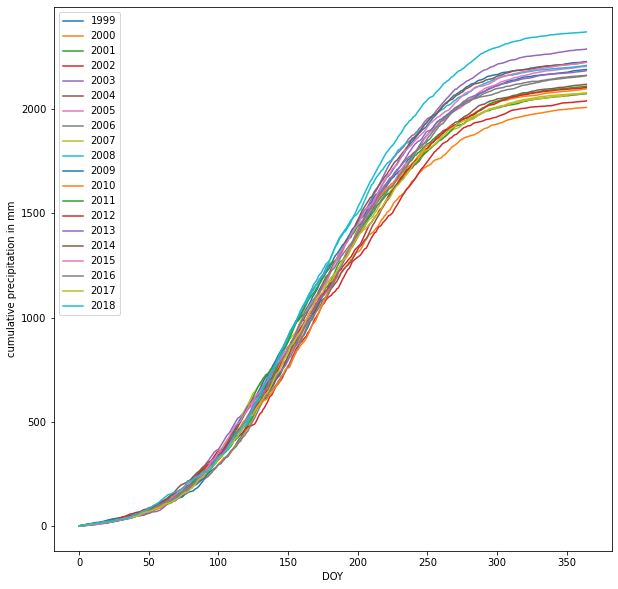

In [15]:
merge_table.cumsum().plot(figsize=[10,10])
plt.ylabel('cumulative precipitation in mm')
plt.xlabel('DOY')
#plt.savefig('R:\\OwnCloud\\WetScapes\\2019_03_31_ERL_paper\\Artikel_ERL\\figures\\prec_cumsum.png', dpi=300, quality=95, format="png")
plt.show()

In [16]:
merge_table_99_17 = merge_table.copy()
merge_table_99_17 = merge_table_99_17.drop(columns=['2018'])
merge_table_99_17.head()

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,1.127778,0.361111,0.788889,0.550000,0.988889,1.177222,0.836111,0.582222,1.240000,0.442778,0.477778,0.453889,1.540000,0.261667,0.178333,0.867778,0.640556,0.782222,0.313889
1,1.016667,0.388889,0.611111,1.288889,0.438889,0.685000,1.135556,0.501111,1.078889,0.922778,1.977778,0.844444,1.528333,0.596667,1.025555,0.373889,1.065000,0.498889,1.362222
2,0.827778,0.405556,0.766667,1.411111,0.672222,1.051667,0.660000,0.562778,1.244444,0.299444,0.766667,0.494444,0.976667,0.502222,0.692778,1.012778,0.371111,1.544444,0.400556
3,0.355556,1.100000,0.938889,2.077778,0.944444,1.534444,0.230000,0.505000,0.417778,1.283889,0.438889,0.666667,0.568889,1.102222,0.365556,1.452778,1.305556,1.217222,0.770000
4,0.266667,1.705556,0.972222,2.022222,0.483333,1.903889,1.100000,0.388333,0.736111,0.776111,2.050000,0.753889,1.598889,1.060556,0.391111,0.458889,0.307778,1.759444,1.038333


In [17]:
merge_table_99_17_cumsum = merge_table_99_17.cumsum()
merge_table_99_17_cumsum.head()

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,1.127778,0.361111,0.788889,0.550000,0.988889,1.177222,0.836111,0.582222,1.240000,0.442778,0.477778,0.453889,1.540000,0.261667,0.178333,0.867778,0.640556,0.782222,0.313889
1,2.144444,0.750000,1.400000,1.838889,1.427778,1.862222,1.971667,1.083333,2.318889,1.365556,2.455555,1.298333,3.068333,0.858333,1.203889,1.241667,1.705556,1.281111,1.676111
2,2.972222,1.155555,2.166667,3.250000,2.100000,2.913889,2.631667,1.646111,3.563334,1.665000,3.222222,1.792778,4.045000,1.360556,1.896667,2.254445,2.076667,2.825556,2.076667
3,3.327778,2.255556,3.105556,5.327778,3.044444,4.448333,2.861667,2.151111,3.981111,2.948889,3.661111,2.459445,4.613889,2.462778,2.262222,3.707222,3.382222,4.042778,2.846667
4,3.594445,3.961111,4.077778,7.350000,3.527778,6.352222,3.961667,2.539444,4.717222,3.725000,5.711111,3.213333,6.212778,3.523334,2.653333,4.166111,3.690000,5.802222,3.885000


In [18]:
merge_table_18 = pd.DataFrame()
merge_table_18['2018'] = merge_table['2018']
print(merge_table_18.head())

merge_table_18_cumsum = merge_table_18.cumsum()
merge_table_18_cumsum.head()

       2018
0  0.828333
1  0.746667
2  0.708889
3  1.210556
4  0.275556


,2018
0,0.828333
1,1.575000
2,2.283889
3,3.494444
4,3.770000


In [19]:
merge_table_99_17_cumsum['max'] = merge_table_99_17_cumsum.max(axis=1)
merge_table_99_17_cumsum['min'] = merge_table_99_17_cumsum.min(axis=1)

merge_table_99_17_cumsum.head()

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,max,min
0,1.127778,0.361111,0.788889,0.550000,0.988889,1.177222,0.836111,0.582222,1.240000,0.442778,...,0.453889,1.540000,0.261667,0.178333,0.867778,0.640556,0.782222,0.313889,1.540000,0.178333
1,2.144444,0.750000,1.400000,1.838889,1.427778,1.862222,1.971667,1.083333,2.318889,1.365556,...,1.298333,3.068333,0.858333,1.203889,1.241667,1.705556,1.281111,1.676111,3.068333,0.750000
2,2.972222,1.155555,2.166667,3.250000,2.100000,2.913889,2.631667,1.646111,3.563334,1.665000,...,1.792778,4.045000,1.360556,1.896667,2.254445,2.076667,2.825556,2.076667,4.045000,1.155555
3,3.327778,2.255556,3.105556,5.327778,3.044444,4.448333,2.861667,2.151111,3.981111,2.948889,...,2.459445,4.613889,2.462778,2.262222,3.707222,3.382222,4.042778,2.846667,5.327778,2.151111
4,3.594445,3.961111,4.077778,7.350000,3.527778,6.352222,3.961667,2.539444,4.717222,3.725000,...,3.213333,6.212778,3.523334,2.653333,4.166111,3.690000,5.802222,3.885000,7.350000,2.539444


In [20]:
prec_cum = pd.DataFrame()
prec_cum['2018'] = merge_table_18_cumsum['2018']
prec_cum['min'] = merge_table_99_17_cumsum['min']
prec_cum['max'] = merge_table_99_17_cumsum['max']
prec_cum.head()

,2018,min,max
0,0.828333,0.178333,1.540000
1,1.575000,0.750000,3.068333
2,2.283889,1.155555,4.045000
3,3.494444,2.151111,5.327778
4,3.770000,2.539444,7.350000


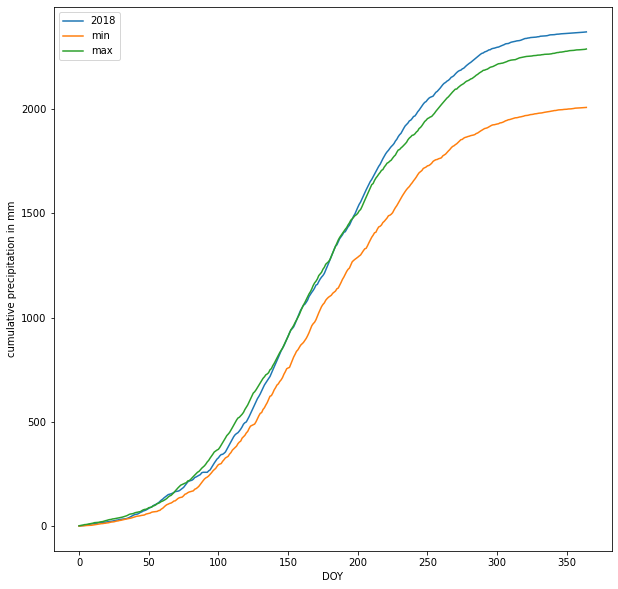

In [21]:
prec_cum.plot(figsize=[10,10])
plt.ylabel('cumulative precipitation in mm')
plt.xlabel('DOY')
plt.show()

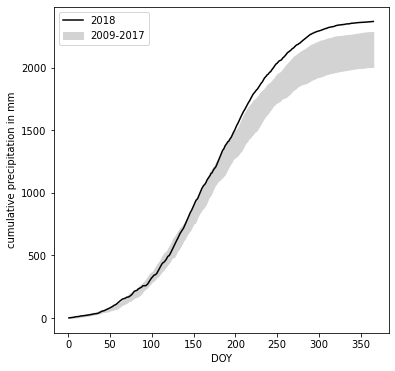

In [22]:
fig = plt.figure(figsize=(6,6))
ax = plt.axes()

x = np.arange(1,366)
ax.plot(x, prec_cum['2018'], color='black', label='2018');
ax.fill_between(x, prec_cum['min'], prec_cum['max'], color='lightgray', label='2009-2017')

ax.legend(loc='upper left')

ax.set_ylabel('cumulative precipitation in mm')
ax.set_xlabel('DOY')

#plt.savefig('R:\\OwnCloud\\WetScapes\\2019_03_31_ERL_paper\\ArtikelERL_english\\figures\\prec_cumsum_area.png', dpi=300, quality=95, format="png")

plt.show()

In [23]:
merge_table_99_17_cumsum_without = merge_table_99_17_cumsum.drop(columns=['min','max'])
merge_table_99_17_cumsum_without.head()

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,1.127778,0.361111,0.788889,0.550000,0.988889,1.177222,0.836111,0.582222,1.240000,0.442778,0.477778,0.453889,1.540000,0.261667,0.178333,0.867778,0.640556,0.782222,0.313889
1,2.144444,0.750000,1.400000,1.838889,1.427778,1.862222,1.971667,1.083333,2.318889,1.365556,2.455555,1.298333,3.068333,0.858333,1.203889,1.241667,1.705556,1.281111,1.676111
2,2.972222,1.155555,2.166667,3.250000,2.100000,2.913889,2.631667,1.646111,3.563334,1.665000,3.222222,1.792778,4.045000,1.360556,1.896667,2.254445,2.076667,2.825556,2.076667
3,3.327778,2.255556,3.105556,5.327778,3.044444,4.448333,2.861667,2.151111,3.981111,2.948889,3.661111,2.459445,4.613889,2.462778,2.262222,3.707222,3.382222,4.042778,2.846667
4,3.594445,3.961111,4.077778,7.350000,3.527778,6.352222,3.961667,2.539444,4.717222,3.725000,5.711111,3.213333,6.212778,3.523334,2.653333,4.166111,3.690000,5.802222,3.885000


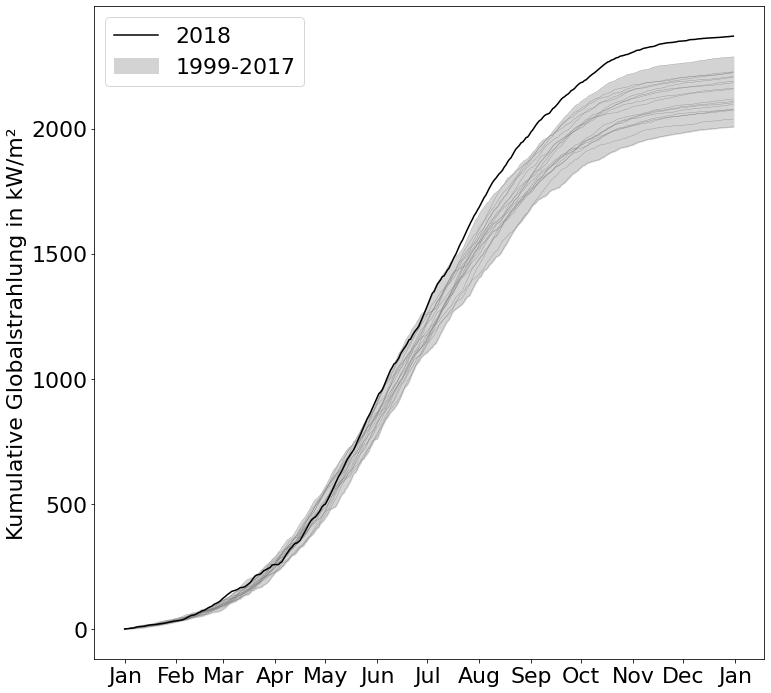

In [26]:
# Set the locator
locator = mdates.MonthLocator()  # every month
# Specify the format - %b gives us Jan, Feb...
fmt = mdates.DateFormatter('%b')

plt.rcParams.update({'font.size': 22})

fig = plt.figure(figsize=(12,12))
ax = plt.axes()

numdays = 365
base = datetime.datetime(2018, 1, 1, 0, 0, 0, 0)
date_list = [base + datetime.timedelta(days=x) for x in range(0,numdays)]

ax.fill_between(date_list, prec_cum['min'], prec_cum['max'], color='lightgray', label='1999-2017')
ax.plot(date_list, merge_table_99_17_cumsum_without, color='grey', linewidth=0.3)
ax.plot(date_list, prec_cum['2018'], color='black', label='2018');
ax.legend(loc='upper left')

ax.set_ylabel('Kumulative Globalstrahlung in kW/m²')
#ax.set_xlabel('DOY')

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)

plt.savefig('R:/OwnCloud/DissBeyer/Diss2020/Arbeit/Abbildungen/05_Ergebnisse/paw_radiation.png', dpi=300, quality=95, format="png")
plt.show()

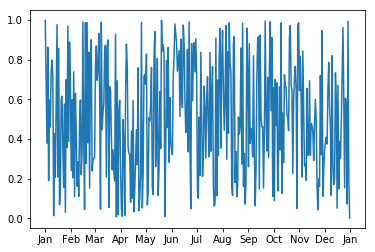

In [106]:
plt.rcParams.update({'font.size': 10})
numdays = 365
base = datetime.datetime(2018, 12, 31, 0, 0, 0, 0)

date_list = [base - datetime.timedelta(days=x) for x in range(0,numdays)]
y=np.random.rand(numdays)


# Set the locator
locator = mdates.MonthLocator()  # every month
# Specify the format - %b gives us Jan, Feb...
fmt = mdates.DateFormatter('%b')

plt.plot(date_list,y)
X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
plt.show()

In [96]:
datetime.datetime.today()

datetime.datetime(2019, 7, 18, 12, 51, 31, 853293)

In [37]:
merge_table_99_17['max'] = merge_table_99_17.max(axis=1)
merge_table_99_17['min'] = merge_table_99_17.min(axis=1)

merge_table_99_17.head()

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,max,min
0,1127.777832,361.111115,788.888916,550.000000,988.888916,1177.222290,836.111084,582.222229,1240.000000,442.777771,...,453.888885,1540.000000,261.666656,178.333328,867.777771,640.555542,782.222229,313.888885,1540.000000,178.333328
1,1016.666687,388.888885,611.111084,1288.888916,438.888885,685.000000,1135.555542,501.111115,1078.888916,922.777771,...,844.444458,1528.333374,596.666687,1025.555542,373.888885,1065.000000,498.888885,1362.222168,1977.777710,373.888885
2,827.777771,405.555542,766.666687,1411.111084,672.222229,1051.666626,660.000000,562.777771,1244.444458,299.444427,...,494.444427,976.666687,502.222229,692.777771,1012.777771,371.111115,1544.444458,400.555542,1544.444458,299.444427
3,355.555542,1100.000000,938.888916,2077.777832,944.444458,1534.444458,230.000000,505.000000,417.777771,1283.888916,...,666.666687,568.888916,1102.222168,365.555542,1452.777832,1305.555542,1217.222168,770.000000,2077.777832,230.000000
4,266.666656,1705.555542,972.222229,2022.222290,483.333344,1903.888916,1100.000000,388.333344,736.111145,776.111084,...,753.888916,1598.888916,1060.555542,391.111115,458.888885,307.777771,1759.444458,1038.333374,2050.000000,266.666656


In [38]:
prec = pd.DataFrame()
prec['2018'] = merge_table_18['2018']
prec['min'] = merge_table_99_17['min']
prec['max'] = merge_table_99_17['max']
prec.head()

,2018,min,max
0,828.333313,178.333328,1540.000000
1,746.666687,373.888885,1977.777710
2,708.888916,299.444427,1544.444458
3,1210.555542,230.000000,2077.777832
4,275.555573,266.666656,2050.000000


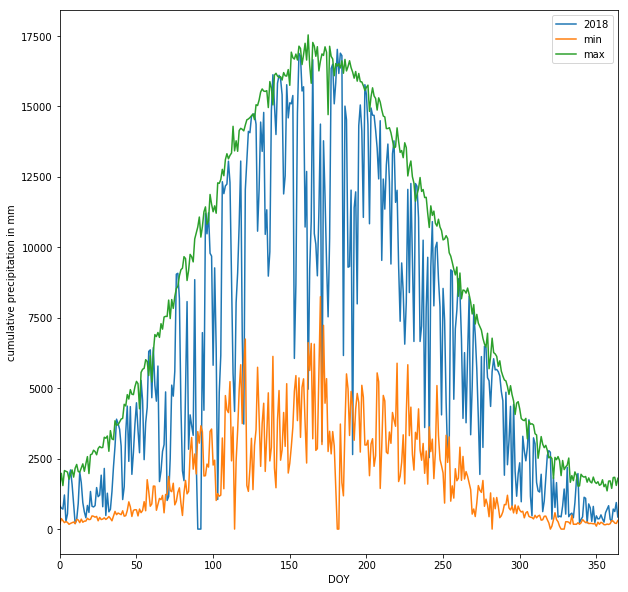

In [39]:
prec.plot(figsize=[10,10])
plt.ylabel('cumulative precipitation in mm')
plt.xlabel('DOY')
plt.show()

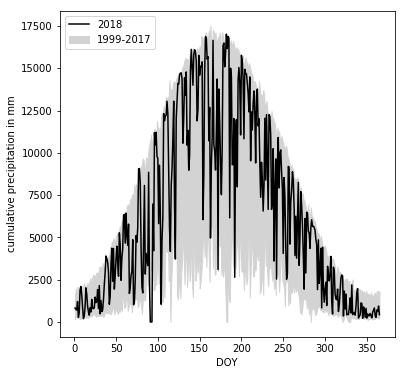

In [40]:
fig = plt.figure(figsize=(6,6))
ax = plt.axes()

x = np.arange(1,366)
ax.plot(x, prec['2018'], color='black', label='2018');
ax.fill_between(x, prec['min'], prec['max'], color='lightgray', label='1999-2017')

ax.legend(loc='upper left')

ax.set_ylabel('cumulative precipitation in mm')
ax.set_xlabel('DOY')

#plt.savefig('R:\\OwnCloud\\WetScapes\\2019_03_31_ERL_paper\\ArtikelERL_english\\figures\\prec_cumsum_area.png', dpi=300, quality=95, format="png")

plt.show()

In [41]:
merge_table_99_17_without = merge_table_99_17.drop(columns=['min','max'])
merge_table_99_17_without.head()

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,1127.777832,361.111115,788.888916,550.000000,988.888916,1177.222290,836.111084,582.222229,1240.000000,442.777771,477.777771,453.888885,1540.000000,261.666656,178.333328,867.777771,640.555542,782.222229,313.888885
1,1016.666687,388.888885,611.111084,1288.888916,438.888885,685.000000,1135.555542,501.111115,1078.888916,922.777771,1977.777710,844.444458,1528.333374,596.666687,1025.555542,373.888885,1065.000000,498.888885,1362.222168
2,827.777771,405.555542,766.666687,1411.111084,672.222229,1051.666626,660.000000,562.777771,1244.444458,299.444427,766.666687,494.444427,976.666687,502.222229,692.777771,1012.777771,371.111115,1544.444458,400.555542
3,355.555542,1100.000000,938.888916,2077.777832,944.444458,1534.444458,230.000000,505.000000,417.777771,1283.888916,438.888885,666.666687,568.888916,1102.222168,365.555542,1452.777832,1305.555542,1217.222168,770.000000
4,266.666656,1705.555542,972.222229,2022.222290,483.333344,1903.888916,1100.000000,388.333344,736.111145,776.111084,2050.000000,753.888916,1598.888916,1060.555542,391.111115,458.888885,307.777771,1759.444458,1038.333374


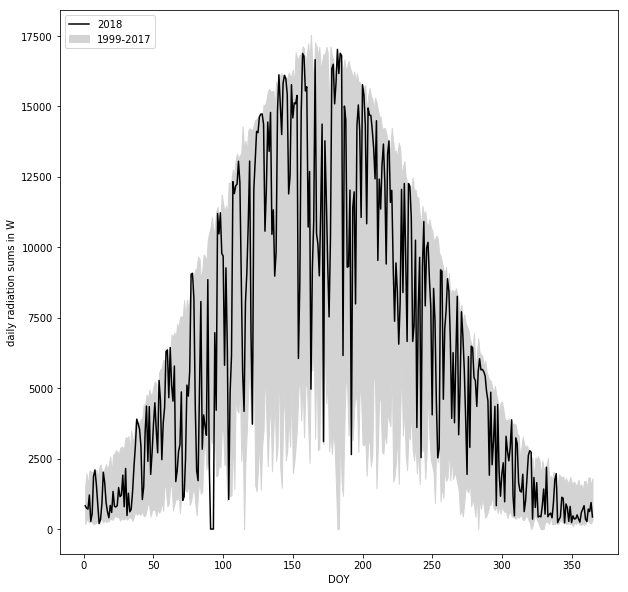

In [45]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes()

x = np.arange(1,366)
ax.fill_between(x, prec['min'], prec['max'], color='lightgray', label='1999-2017')
#ax.plot(x, merge_table_99_17_without, color='grey', linewidth=0.3)
ax.plot(x, prec['2018'], color='black', label='2018');
ax.legend(loc='upper left')

ax.set_ylabel('daily radiation sums in W')
ax.set_xlabel('DOY')

#plt.savefig('R:\\OwnCloud\\WetScapes\\2019_03_31_ERL_paper\\ArtikelERL_english\\figures\\prec_cumsum_area.png', dpi=300, quality=95, format="png")

plt.show()